In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Fes_system/amns_fes_main/csv/Batch-1.1.csv')
df.head()

df1 = pd.read_csv('/content/drive/MyDrive/Fes_system/amns_fes_main/csv/Batch-1.2.csv')
df1.head()

df2 = pd.read_csv('/content/drive/MyDrive/Fes_system/amns_fes_main/csv/Batch-1.3.csv')
df2.head()

df3 = pd.read_csv('/content/drive/MyDrive/Fes_system/amns_fes_main/csv/Batch-1.4.csv')
df3.head()

,SampleTime,Process Mode,Oxygen Consumption -Top,Furnace Power,CombustionChamber Pressure,Suction Damper Position feedback,FDC inlet Temprature,FDC Outlet Temp,FDC Outlet Temp - Upperside,DP across FDC,...,DP Across baghouse - UpperSide,DP Across baghouse - LowerSide,Pressure ID Fan Inlet,Canopy Damper Position,Unnamed: 19,Unnamed: 20,ID Fan1 Speed,ID Fan1 Current,ID Fan2 Speed,ID Fan2 Current
0,11.08.2024_11.45.17,ESH_DD_S7_PRG/PLC->HMI.EafPhaseMode,ESH_CON_S7_PRG/ProData_C1.TotO2Lnc,ESH_CON_S7_PRG/ProData_C1.TotalEn,12AA001-PIA002/PRESSURE.OutV,SUCTION_SH1/POSITION.OutV,12AP001-TIA001/TEMPERATURE.OutV,12BA001-TIA001/Temperature.OutV,12BA001-TIA002/Temperature.OutV,12BA001-DPT001/Pressure.OutV,...,12AQ001-DPT001/Pressure.OutV,12AQ001-DPT002/Pressure.OutV,12AQ001-PIA001/Pressure.OutV,CANOPY_SH1/POSITION.OutV,12AA001-TIA001/Temperature.OutV,12AP001-TIA005/Temperature.OutV,ESH_DD_S7_PRG/PLC->HMI4.Sh11_IDfan1_Speed_FB,ESH_DD_S7_PRG/PLC->HMI4.Sh11_IDfan1_Current_FB,ESH_DD_S7_PRG/PLC->HMI4.Sh11_IDfan2_Speed_FB,ESH_DD_S7_PRG/PLC->HMI4.Sh11_IDfan2_Current_FB
1,29.08.2024_18.24.38,32,5631.284,0,-14.00463,89.00825,494.0611,189.6,190.3,79.20645,...,16.89091,20.68721,-410.8796,61.46122,41.8,87.90001,946.2,217.775,945.4032,218.1965
2,29.08.2024_18.29.38,64,6632.452,0,-9.964554,52.36545,489.247,180,180.1,24.75405,...,16.72743,20.60475,-404.116,64.78335,43.6,78.9,946.2,222.7628,945.4032,223.676
3,29.08.2024_18.34.38,64,7540.279,0,-10.01157,45.20037,413.4151,155.9,155.5,26.14294,...,16.06626,19.59057,-397.3163,64.77937,40.3,68.9,946.2,222.4818,945.4032,227.6803
4,29.08.2024_18.39.37,16,7540.279,0.4,-8.991608,41.59071,297.4392,121.7,121.9,7.096354,...,14.55295,18.04832,-402.6331,62.5076,41.7,63.6,946.2,222.833,945.4032,217.3535


In [3]:
df = df.drop(0)
df1 = df1.drop(0)
df2 = df2.drop(0)
df3 = df3.drop(0)

In [4]:
# df = df.drop(['Unnamed: 19','Unnamed: 20',],axis=1)
# df1 = df1.drop(['Unnamed: 19','Unnamed: 20'],axis=1)
# df2 = df2.drop(['Unnamed: 19','Unnamed: 20'],axis=1)
# df3 = df3.drop(['Unnamed: 19','Unnamed: 20'],axis=1)

In [5]:
df = pd.concat([df, df1])
df = pd.concat([df, df2])
df = pd.concat([df, df3])

In [6]:
print(df.shape)
print(df1.shape)
print(df2.shape)
print(df3.shape)

(4319, 25)
(1080, 25)
(1079, 25)
(1081, 25)


In [7]:
df = df.iloc[:,16:24]
df.head()

,DP Across baghouse - LowerSide,Pressure ID Fan Inlet,Canopy Damper Position,Unnamed: 19,Unnamed: 20,ID Fan1 Speed,ID Fan1 Current,ID Fan2 Speed
1,18.51997,-400.0651,60.93208,41.2,80.7,946.2,226.4158,945.4032
2,18.84115,-397.2801,60.93605,43.7,86.0,946.2,221.428,945.4032
3,18.69213,-391.2399,60.93605,43.1,85.6,946.2,221.3578,945.4032
4,18.62558,-390.9505,60.93208,42.2,85.1,946.2,222.6222,945.4032
5,18.30874,-376.4106,64.65205,43.6,80.1,946.2,215.3163,945.4032


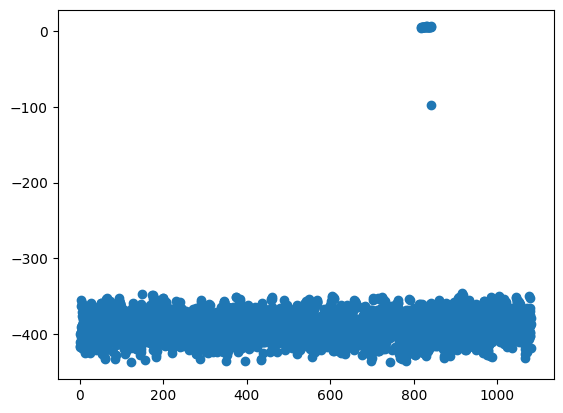

In [8]:
# Convert the specific column to numeric before plotting
df['Pressure ID Fan Inlet'] = pd.to_numeric(df['Pressure ID Fan Inlet'], errors='coerce')

# Now plot the scatter plot with numeric data
plt.scatter(df['Pressure ID Fan Inlet'].index,df['Pressure ID Fan Inlet'].values)

In [9]:
#we can see every column is having datatype of 'object'
#so convert all column datatype into numeric

for col in df.columns:
  df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4319 entries, 1 to 1081
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DP Across baghouse - LowerSide  4319 non-null   float64
 1   Pressure ID Fan Inlet           4319 non-null   float64
 2   Canopy Damper Position          4319 non-null   float64
 3   Unnamed: 19                     4319 non-null   float64
 4   Unnamed: 20                     4319 non-null   float64
 5   ID Fan1 Speed                   4319 non-null   float64
 6   ID Fan1 Current                 4319 non-null   float64
 7   ID Fan2 Speed                   4319 non-null   float64
dtypes: float64(8)
memory usage: 303.7 KB


In [10]:
avg = df['Pressure ID Fan Inlet'].mean()
print(avg)
df.corr()['Pressure ID Fan Inlet'].sort_values(ascending=False)

-389.8751249326233


,Pressure ID Fan Inlet
Pressure ID Fan Inlet,1.000000
Canopy Damper Position,0.538083
Unnamed: 19,0.178166
Unnamed: 20,-0.296545
ID Fan1 Current,-0.819770
DP Across baghouse - LowerSide,-0.823882
ID Fan1 Speed,-0.880925
ID Fan2 Speed,-0.886959


Axes(0.125,0.11;0.775x0.77)


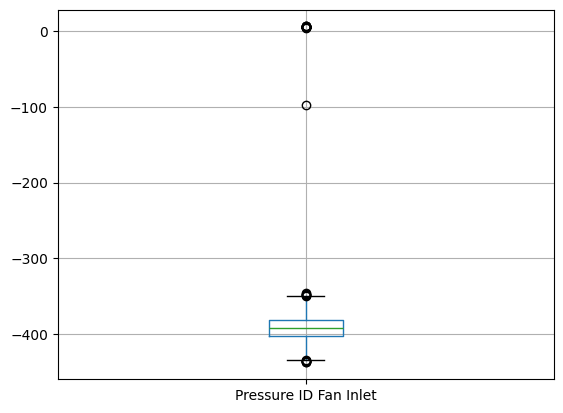

In [11]:
# print(df.boxplot('DP across FDC'))
print(df.boxplot('Pressure ID Fan Inlet'))

In [12]:
df.shape

(4319, 8)

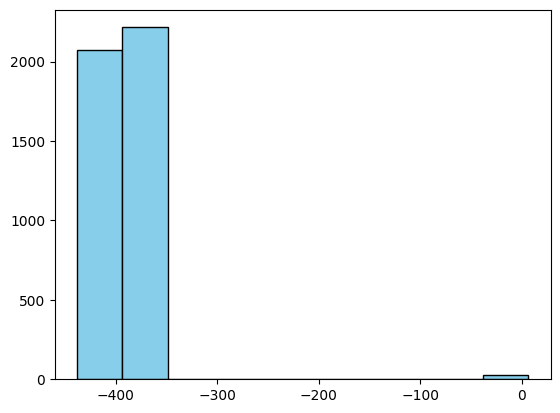

In [13]:
plt.hist(df['Pressure ID Fan Inlet'], bins=10, color='skyblue', edgecolor='black')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(['Pressure ID Fan Inlet'], axis=1),df['Pressure ID Fan Inlet'],test_size=0.2,random_state=42)
x_train.shape, x_test.shape

((3455, 7), (864, 7))

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


scaler.fit(x_train)


x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# # fit the scaler to the train set, it will learn the parameters
# scaler.fit(x_train)

# # transform train and test sets
# x_train_scaled_normalized = scaler.transform(x_train)
# x_test_scaled_normalized = scaler.transform(x_test)

In [17]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestRegressor # Import the regressor

# param_grid = {
#     # The parameter grid seems to be defined for a classifier, not a regressor.
#     # For RandomForestRegressor, the parameters would be like:
#     'n_estimators': [200,300,400,500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [4, 5, 6, 7, 8],
#     # criterion for regressor is 'squared_error', 'absolute_error', 'poisson', etc.
#     # 'criterion': ['squared_error']
# }

# # Create a RandomForestRegressor instance
# estimator = (random_state=42) # Added random_state for reproducibility

# # Pass the estimator and the parameter grid to GridSearchCV
# # Note: You might need to adjust the param_grid to match the parameters of RandomForestRegressor
# # and remove the 'classification__' prefix if you are not using a Pipeline named 'classification'.
# grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=5) # Added cv for cross-validation


In [18]:
# grid_search.fit(x_train, y_train)

# # Get the best parameters and score
# print("Best parameters found: ", grid_search.best_params_)
# print("Best cross-validation score: ", grid_search.best_score_)

In [19]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rand = RandomForestRegressor(
    n_estimators=500,
    max_depth=18,
    min_samples_split=4,
    max_features='sqrt',
)
x_train_rand = rand.fit(x_train, y_train)
y_pred_rand_test = rand.predict(x_test)
y_pred_rand_train = rand.predict(x_train)

# plt.grid(True)
# plt.scatter(y_pred_rand, y_test)

In [20]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
rand = XGBRegressor(
    max_depth=10,
    n_estimators=300,
    learning_rate=0.1,
    reg_alpha=0.1,
    reg_lambda=0.5,
    early_stopping_rounds=20
)
x_train_rand = rand.fit(x_train, y_train,eval_set=[(x_test, y_test)], verbose=False)
y_pred_rand_test = rand.predict(x_test)
y_pred_rand_train = rand.predict(x_train)
print(r2_score(y_test, y_pred_rand_test))

print(mean_absolute_error(y_test, y_pred_rand_test))
print(np.sqrt(mean_squared_error(y_test,y_pred_rand_test)))

print(mean_absolute_error(y_train, y_pred_rand_train))
print(np.sqrt(mean_squared_error(y_train,y_pred_rand_train)))

0.8438617214244548
5.44666706262744
11.219679271924797
3.1692219609635037
4.709521122918656


In [21]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Base models
rf1 = RandomForestRegressor(n_estimators=600, max_depth=22, random_state=42)
rf2 = RandomForestRegressor(n_estimators=500, max_depth=18, random_state=42)
xgb = XGBRegressor(random_state=42)

# Meta-model (you can use Ridge, LinearRegression, etc.)
meta_model = RidgeCV()

# Stacking ensemble
stack_model = StackingRegressor(
    estimators=[
        ('rf1', rf1),
        ('rf2', rf2),
        ('xgb', xgb)
    ],
    final_estimator=meta_model
)

# Fit ensemble
stack_model.fit(x_train, y_train)

# Predict and evaluate
stack_pred = stack_model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, stack_pred))
print("Stacking RMSE:", rmse)
print(r2_score(y_test, stack_pred))

Stacking RMSE: 8.366674571916443
0.91317310778734


In [22]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = 4
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(stack_model, x_train, y_train, cv=kf)

In [23]:
print("Cross-Validation Results (Accuracy):")
for i, result in enumerate(cross_val_results, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")

print(f'Mean Accuracy: {cross_val_results.mean()* 100:.2f}%')

Cross-Validation Results (Accuracy):
  Fold 1: 94.42%
  Fold 2: 97.26%
  Fold 3: 93.86%
  Fold 4: 96.43%
Mean Accuracy: 95.49%


In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

arr = []
def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(n_estimators=100),
        "Gradient Boosting": GradientBoostingRegressor(),
        "Support Vector Regressor": SVR(),
        "Neural Network (MLP)": MLPRegressor(max_iter=1000)
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        results.append((name, mae, rmse, r2))
        arr.append(y_pred)
        # print(name)
        # plt.scatter(y_pred, y_test)
        # plt.show()

    # Print results
    print(f"{'Model':30} {'MAE':>10} {'RMSE':>10} {'R² Score':>10}")
    print("="*60)
    for name, mae, rmse, r2 in sorted(results, key=lambda x: x[2]):  # sort by RMSE
        print(f"{name:30} {mae:10.2f} {rmse:10.2f} {r2:10.4f}")


In [25]:
evaluate_models(x_train, x_test, y_train, y_test)
# evaluate_models(x_train_scaled, x_test_scaled, y_train, y_test)
# evaluate_models(x_train_scaled_normalized, x_test_scaled_normalized, y_train, y_test)

In [29]:
df.columns

Index(['DP Across baghouse - LowerSide', 'Pressure ID Fan Inlet',
       'Canopy Damper Position', 'Unnamed: 19', 'Unnamed: 20', 'ID Fan1 Speed',
       'ID Fan1 Current', 'ID Fan2 Speed'],
      dtype='object')